In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shard_path = '../../../data/commaai/training_files_filtered/tfrecords/102.tfrecords'

In [5]:
def imgs_input_fn(filenames, perform_shuffle = True, repeat_count = 1, batch_size = 32): 
    
    # reads in single training example and returns it in a format that the estimator can
    # use
    def _parse_function(proto):
        # define your tfrecord again. Remember that you saved your image as a string.
        keys_to_features = {'image': tf.io.FixedLenFeature([], tf.string),
                            'label': tf.io.FixedLenFeature([], tf.float32),
                            'rows': tf.io.FixedLenFeature([], tf.int64),
                            'cols': tf.io.FixedLenFeature([], tf.int64),
                            'depth': tf.io.FixedLenFeature([], tf.int64),
                            'tr_label': tf.io.FixedLenFeature([], tf.float32)
                           }

        # Load one example
        parsed_example = tf.io.parse_single_example(proto, keys_to_features)

        # fourth channel does not contain anything
        image_shape = tf.stack([66, 200, 4])
        image_raw = parsed_example['image']
        
        label = tf.cast(parsed_example['label'], tf.float32)
        tr_label = tf.cast(parsed_example['tr_label'], tf.float32)
        image = tf.io.decode_raw(image_raw, tf.uint8)
        image = tf.cast(image, tf.float32)

        image = tf.reshape(image, image_shape)/255
        
        return {'image':image}, tr_label
    
    dataset = tf.data.TFRecordDataset(filenames = filenames)
    dataset = dataset.map(_parse_function)
    if perform_shuffle:
        # Randomizes input using a window of 256 elements (read into memory)
        dataset = dataset.shuffle(buffer_size=256)
    dataset = dataset.repeat(repeat_count)  # Repeats dataset this # times
    dataset = dataset.batch(batch_size)  # Batch size to use
    iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)
    batch_features, batch_labels = iterator.get_next()
    
    return batch_features, batch_labels

In [6]:
images = []
labels = []
tr_labels = []
for i in range(0,1):
    image, tr_label = imgs_input_fn(shard_path)
    images.append(image)
    tr_labels.append(tr_label)

In [7]:
imgs = np.array(images[0]['image'])

In [8]:
imgs.shape

(32, 66, 200, 4)

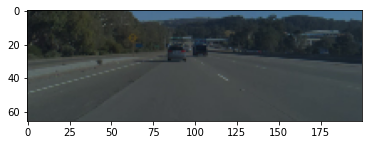

In [9]:
plt.imshow(imgs[0,:,:,0:3])

In [ ]:
df = pd.read_csv('../../../data/commaai/training_files_filtered/tfrecords/angle.csv', header = None)

In [ ]:
df

In [ ]:
plt.hist(df[0], bins = 100)

In [13]:
df = pd.read_csv('../../../data/commaai/training_files_filtered/tfrecords/angle.csv', header = None)

In [14]:
df.shape

(56654, 1)

In [27]:
df = pd.read_csv('../../../data/commaai/training_files_filtered/indices/review.csv')

In [29]:
df.loc[df['use'] == 1].shape

(54208, 4)

In [40]:
df = pd.read_csv('../../../data/commaai/training_files_filtered/indices/review.csv')

In [41]:
df.shape

(355543, 4)